<a href="https://colab.research.google.com/github/yuvarshini/Bigdataproject/blob/main/Sentiment_Analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv("Corona_NLP_train.csv",encoding='latin1')
df = pd.DataFrame(data)


In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


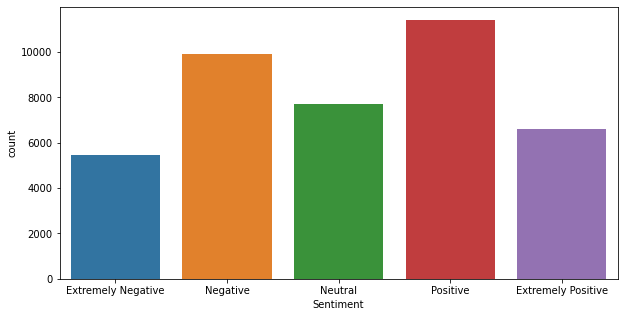

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], )

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in df["OriginalTweet"]:
  tweet.append(reg.sub(" ", i))
df = pd.concat([df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)

In [ ]:
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Gahan https t co iFz9FAn2Pa and https ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the ou...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))     # make a set of stopwords
vectoriser = TfidfVectorizer(stop_words=None)

In [ ]:
X_train = vectoriser.fit_transform(df["CleanedTweet"])
# Encoding the classes in numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(df['Sentiment'])



In [ ]:
test_data = pd.read_csv("Corona_NLP_test.csv",encoding='latin1')
test_df = pd.DataFrame(test_data)
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
reg1 = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in test_df["OriginalTweet"]:
    tweet.append(reg1.sub(" ", i))
test_df = pd.concat([test_df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,TRENDING New Yorkers encounter empty supermar...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,When I couldn t find hand sanitizer at Fred Me...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,Find out how you can protect yourself and love...
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,buying hits City as anxious shoppers stock...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,19 One week everyone...


In [ ]:
X_test = vectoriser.transform(test_df["CleanedTweet"])
y_test = encoder.transform(test_df["Sentiment"])
# Prediction
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,0,4
1,4,4
2,1,4
3,2,2
4,3,2


In [ ]:
from sklearn.metrics import precision_score , recall_score
from sklearn.naive_bayes import MultinomialNB

print("Training Accuracy :", classifier.score(X_train, y_train))
print("Validation Accuracy :", classifier.score(X_test, y_test))

# calculating the f1 score for the validation set
print(recall_score(y_test,y_pred,average=None))


Training Accuracy : 0.49692640377092595
Validation Accuracy : 0.33359662980516064
[0.         0.01335559 0.33717579 0.03231018 0.93769799]


In [ ]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_test,y_pred,average=None))


[0.         0.88888889 0.40068493 0.90909091 0.30726644]


In [ ]:
print(recall_score(y_test,y_pred,average=None))

[0.         0.01335559 0.33717579 0.03231018 0.93769799]


In [ ]:
import sklearn
sklearn.metrics.classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.89      0.01      0.03       599
           2       0.40      0.34      0.37      1041
           3       0.91      0.03      0.06       619
           4       0.31      0.94      0.46       947

    accuracy                           0.33      3798
   macro avg       0.50      0.26      0.18      3798
weighted avg       0.47      0.33      0.23      3798



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train_dense=X_train.toarray()
X_test_dense=X_test.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_dense, y_train)
y_pred1=nb.predict(X_test_dense)
print("Training Accuracy :", nb.score(X_train_dense, y_train))
print("Validation Accuracy :",nb.score(X_test_dense, y_test))
print(recall_score(y_test,y_pred1,average=None))

In [ ]:
from sklearn.metrics import precision_score , recall_score
y_pred1= nb.predict(X_test)
print(precision_score(y_test,y_pred1,average=None))

In [ ]:
print(recall_score(y_test,y_pred1,average=None))

In [ ]:
import sklearn
sklearn.metrics.classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print("Training Accuracy :", model2.score(X_train, y_train))
print("Validation Accuracy :", model2.score(X_test, y_test))
print(recall_score(y_test,y_pred2,average=None))

Training Accuracy : 0.7961221663386544
Validation Accuracy : 0.5842548709847288
[0.45439189 0.51252087 0.57444765 0.726979   0.62829989]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import precision_score , recall_score

y_pred2=model2.predict(X_test)

print(precision_score(y_test,y_pred2,average=None))

[0.67418546 0.68070953 0.54264973 0.65406977 0.51381693]


In [ ]:
import sklearn
sklearn.metrics.classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54       592
           1       0.68      0.51      0.58       599
           2       0.54      0.57      0.56      1041
           3       0.65      0.73      0.69       619
           4       0.51      0.63      0.57       947

    accuracy                           0.58      3798
   macro avg       0.61      0.58      0.59      3798
weighted avg       0.60      0.58      0.58      3798



In [ ]:
from sklearn.metrics import precision_score , recall_score
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print("Training Accuracy :", model3.score(X_train, y_train))
print("Validation Accuracy :",model3.score(X_test, y_test))

# calculating the f1 score for the validation set
print(recall_score(y_test,y_pred3,average=None))

Training Accuracy : 0.9665913453361518
Validation Accuracy : 0.5989994734070564
[0.42905405 0.48414023 0.61767531 0.67689822 0.70644139]


In [ ]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_test,y_pred3,average=None))


[0.7673716  0.79234973 0.54445385 0.68464052 0.51146789]


In [ ]:
print(recall_score(y_test,y_pred3,average=None))

[0.42905405 0.48414023 0.61767531 0.67689822 0.70644139]


In [ ]:
import sklearn
sklearn.metrics.classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.77      0.43      0.55       592
           1       0.79      0.48      0.60       599
           2       0.54      0.62      0.58      1041
           3       0.68      0.68      0.68       619
           4       0.51      0.71      0.59       947

    accuracy                           0.60      3798
   macro avg       0.66      0.58      0.60      3798
weighted avg       0.63      0.60      0.60      3798



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier()
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

print("Training Accuracy :", model4.score(X_train, y_train))
print("Validation Accuracy :", model4.score(X_test, y_test))
print(recall_score(y_test,y_pred4,average=None))


Training Accuracy : 1.0
Validation Accuracy : 0.44075829383886256
[0.26351351 0.25542571 0.41690682 0.61066236 0.58394931]


In [ ]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_test,y_pred4,average=None))


[0.65       0.65665236 0.41098485 0.51150203 0.36143791]


In [ ]:
import sklearn
sklearn.metrics.classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.65      0.26      0.38       592
           1       0.66      0.26      0.37       599
           2       0.41      0.42      0.41      1041
           3       0.51      0.61      0.56       619
           4       0.36      0.58      0.45       947

    accuracy                           0.44      3798
   macro avg       0.52      0.43      0.43      3798
weighted avg       0.49      0.44      0.43      3798



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)
print("Training Accuracy :", model5.score(X_train, y_train))
print("Validation Accuracy :", model5.score(X_test, y_test))


print(recall_score(y_test,y_pred5,average=None))


Training Accuracy : 1.0
Validation Accuracy : 0.38730911005792523
[0.36655405 0.40066778 0.3246878  0.53150242 0.36642027]


In [ ]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_test,y_pred5,average=None))


[0.39240506 0.42553191 0.35919235 0.43633952 0.35192698]


In [ ]:
import sklearn
sklearn.metrics.classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.39      0.37      0.38       592
           1       0.43      0.40      0.41       599
           2       0.36      0.32      0.34      1041
           3       0.44      0.53      0.48       619
           4       0.35      0.37      0.36       947

    accuracy                           0.39      3798
   macro avg       0.39      0.40      0.39      3798
weighted avg       0.39      0.39      0.39      3798



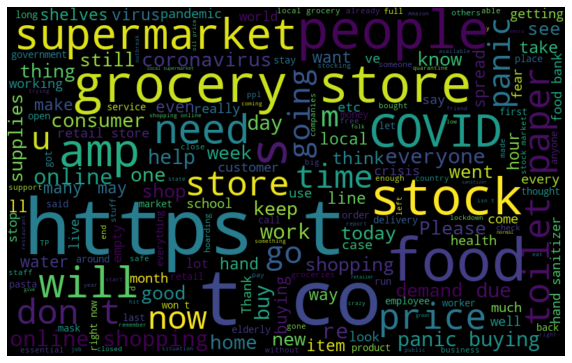

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in test_df['CleanedTweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

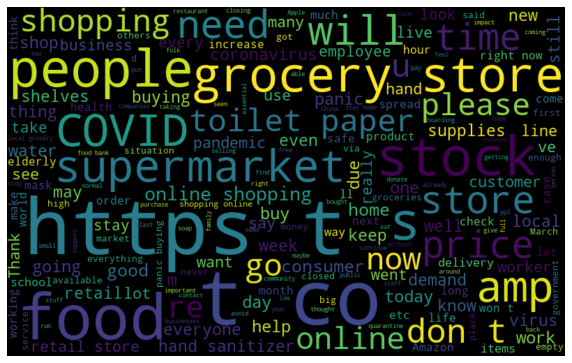

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in test_df['CleanedTweet'][test_df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

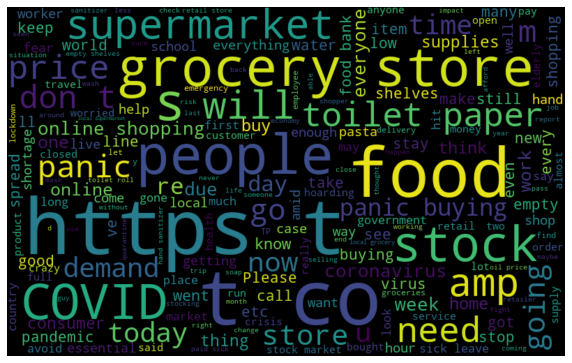

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in test_df['CleanedTweet'][test_df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

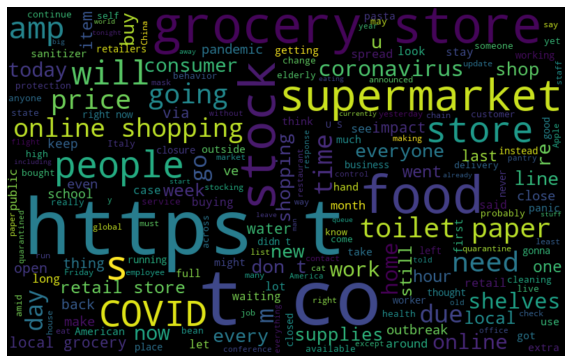

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in test_df['CleanedTweet'][test_df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

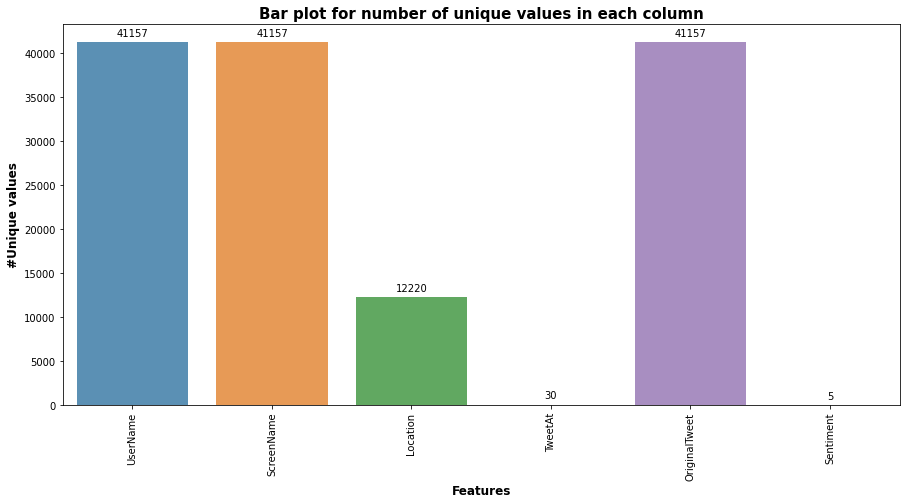

In [ ]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



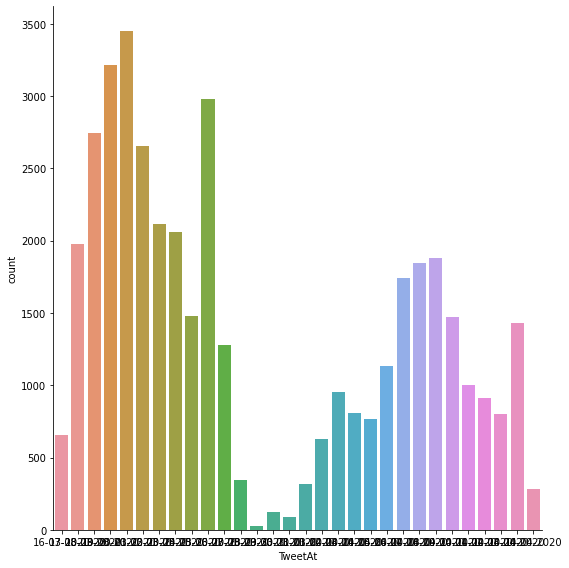

In [ ]:
loc_analysis = pd.DataFrame(df['Location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'Location':'count'})
import plotly.graph_objects as go
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="Ratio on Location", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()
sns.catplot("TweetAt", data=df, kind="count", height=8)

In [ ]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')
Top_Location_Of_tweet.head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [ ]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


[Text(0, 0, 'London'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Australia')]

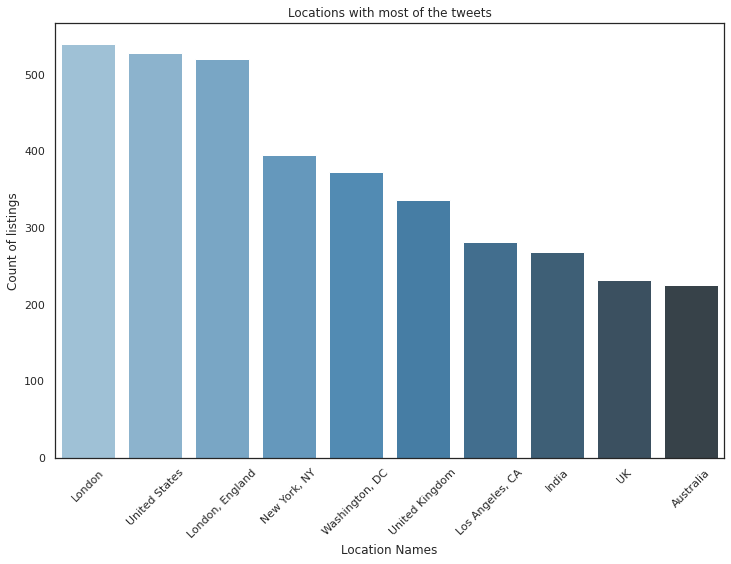

In [ ]:
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)